In [368]:
"""
Purpose: 
    Predict the who is going to live and who won't in Game of Thrones .
    The steps are the following: 
    1) Importing and analysing the data
    2) Missing values detection, Flagging and Imputation
    3) Feature Engineering 
    4) Correlation Analysis
    5) Logistic Regression/KNN/ Decision Tree/Random Forest/ GBM Trials
    7) Comparing the score of different regression models   
"""

"\nPurpose: \n    Predict the who is going to live and who won't in Game of Thrones .\n    The steps are the following: \n    1) Importing and analysing the data\n    2) Missing values detection, Flagging and Imputation\n    3) Feature Engineering \n    4) Correlation Analysis\n    5) Logistic Regression/KNN/ Decision Tree/Random Forest/ GBM Trials\n    7) Comparing the score of different regression models   \n"

# 1) Importing the whole dataset of Game Of Throne

In [369]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
import numpy as np                                   # numpu
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
#declaring the file name
file = './GOT_character_predictions.xlsx'

#storing the excel into a dataframe variable
got = pd.read_excel(io = file)
#opening the excel 
got.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,...,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


# 2) Missing values detection, Flagging and Imputation

## Checking for missing values

In [370]:
got.isnull().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

## Creating flag columns for the missing values

In [371]:
#for every col in got df 
for col in got:
    #analizing if each column has missing value
    if got[col].isnull().sum() > 0:
        #creating a m column
        got['m_' + col] = got[col].isnull().astype(int)

## Imputing missing values

#### Replacing with the word  "empty" in object columns and with the mean, Age and Date of Birth. Imput with median the age and date of birth

In [372]:
got_drop = got.dropna()
for col in got:
    if got[col].dtypes == 'object':
        value = 'empty'
        got[col].fillna(value = value,
                        inplace = True)
    elif got[col].dtypes == 'int64' or got[col].dtypes == 'float64' and col[:2] == 'is':
        value = -1
        got[col].fillna(value = value,
                        inplace = True)    
    else:
        continue
        
med_age = got['age'].median()
got['age'].fillna(value = med_age,
                        inplace = True)

med_age = got['dateOfBirth'].median()
got['dateOfBirth'].fillna(value = value,
                        inplace = True)


    

## Checking for missing values 

In [373]:
got.isnull().sum()

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir                        0
m_house 

# 3) Feature Engineering 

## Gender Guessing

In [374]:


# import gender_guesser.detector as gender
# # STEP 1: splitting names and surnames

# # placeholder list
# placeholder_lst = []

# # looping over each name 
# for index, col in got.iterrows():
    
#     # splitting name by space
#     split_name = got.loc[index, 'name'].split(sep = ' ')
    
#     # appending placeholder_lst with the results
#     placeholder_lst.append(split_name)
    

# # converting placeholder_lst into a DataFrame 
# name_df = pd.DataFrame(placeholder_lst)


# #renaming the columns 
# name_df.columns = ['name_1' , 'name_2', 'name_3','name_4', 'name_5', 'name_6']
# #concatening the name 1 with the dataset

# got = pd.concat([got, name_df['name_1']],
#                      axis = 1)

# # guessing gender based on (given) name

# # placeholder list
# placeholder_lst = []


# # looping to guess gender
# for name in got['name_1']:
#     guess = gender.Detector().get_gender(name)
#     placeholder_lst.append(guess)


# # converting list into a series
# got['gender_guess'] = pd.Series(placeholder_lst)

# got_copy = pd.DataFrame.copy(got)



## Storing the list of gender guess into a variable

In [375]:
gender_guess = ['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_female', 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown',
 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 
 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 
 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']

In [376]:
#concatening the gender list to the GOT DataFrame
got['gender_guess'] =pd.Series(gender_guess)

## Working with the results of the gender guess

In [377]:
# declaring the vairables
male = ['brother','king','lord','master','prince']
female = ['wife','mistress','princess','widow', 'lady']
# looping over each name 
for index, col in got.iterrows():
    #Creating a new list of gender that narrows the values of gender list
    if got.loc[index, 'gender_guess'] == 'mostly_male':
        got.loc[index,'gender_guess_2'] = 'male'
    elif got.loc[index, 'gender_guess'] == 'mostly_female':
        got.loc[index, 'gender_guess_2'] = 'female'
    elif got.loc[index, 'gender_guess'] == 'unknown':
        got.loc[index, 'gender_guess_2'] = 'not_known'
    else:
        got.loc[index, 'gender_guess_2'] = got.loc[index, 'gender_guess']

for index, col in got.iterrows():
    for i in male:
        if i in got.loc[index, 'title'].casefold():
            got.loc[index, 'gender_guess_2'] = 'male'
            break
        else:
            continue
            
    for x in female:
        if x in got.loc[index, 'title'].casefold():
            got.loc[index, 'gender_guess_2'] = 'female'
            break
        else: 
            continue




In [378]:
got['gender_guess_2'].value_counts()

not_known    1236
male          520
female        180
andy           10
Name: gender_guess_2, dtype: int64

## working the feature engineering

#### If I guess the gender of the spouse, the other spouse must have the opposite sex, so I changed the sex. Then I did some cuts in the popularity according to the concentration of deads. Finally I did a cut in age.

In [379]:
royalti = ['queen', 'king', 'lady', 'master', 'ser', 'winterfell', 'khal', 'princess', 'septon', 'casterly rock']
army = ['captain' , 'watch', 'commander', ]
for index, col in got.iterrows():
    if  got.loc[index, 'gender_guess_2'] == 'male' and got.loc[index, 'spouse'] != 'empty':
        index2 = got.index
        condition = got["name"] == got.loc[index, 'spouse']
        indices = index2[condition]
        indices_list = np.array(indices.tolist())
        if np.count_nonzero(indices_list) > 0:
            if got.loc[indices_list.item(0), 'gender_guess_2'] == 'male':
                got.loc[index, 'gender_guess_2'] = 'female'
            elif got.loc[indices_list.item(0), 'gender_guess_2'] == 'female':
                got.loc[index, 'gender_guess_2'] = 'male'
            else:
                continue
        else:
            continue
    for i in royalti:
        if i in got.loc[index, 'title'].casefold():
            got.loc[index, 'title_h'] = 'royalti'
    for x in army:
        if x in got.loc[index, 'title'].casefold():
            got.loc[index, 'title_h'] = 'army'
            
    if got.loc[index, 'popularity'] <= 0.025:
        got.loc[index, 'popularity_h'] = 'rg1'
    elif got.loc[index, 'popularity'] < 0.15:
        got.loc[index, 'popularity_h'] = 'rg2'   
    elif got.loc[index, 'popularity'] >= 0.15:
        got.loc[index, 'popularity_h'] = 'rg3'   
    else:
        print('error')
        
    if got.loc[index, 'age'] <= 3:
        got.loc[index, 'age_h'] = 'rg1'   
    elif got.loc[index, 'age'] <= 64:
        got.loc[index, 'age_h'] = 'rg2'   
    elif got.loc[index, 'age'] > 64:
        got.loc[index, 'age_h'] = 'rg3'
    else:
        print('error')
    
    got.loc[index, 'name_h'] =  got.loc[index, 'name'].count(" ") + 1
    
    
got['agedatebirth'] = got['age'] + got['dateOfBirth']        

    
value = 'empty'
got['title_h'].fillna(value = value,
                        inplace = True)          

got['gender_guess_2'].value_counts()

not_known    1236
male          519
female        181
andy           10
Name: gender_guess_2, dtype: int64

In [380]:
temp_got = pd.get_dummies(columns = ['gender_guess_2', 'title_h','popularity_h','age_h'], data = got ) 
got = temp_got
                        

In [381]:
# ########################################
# # optimal_neighbors
# ########################################
# def optimal_neighbors(x_data,
#                       y_data,
#                       standardize = True,
#                       pct_test=0.25,
#                       seed=219,
#                       response_type='reg',
#                       max_neighbors=20,
#                       show_viz=True):
#     """
# Exhaustively compute training and testing results for KNN across
# [1, max_neighbors]. Outputs the maximum test score and (by default) a
# visualization of the results.
# PARAMETERS
# ----------
# x_data        : explanatory variable data
# y_data        : response variable
# standardize   : whether or not to standardize the x data, default True
# pct_test      : test size for training and validation from (0,1), default 0.25
# seed          : random seed to be used in algorithm, default 219
# response_type : type of neighbors algorithm to use, default 'reg'
#     Use 'reg' for regression (KNeighborsRegressor)
#     Use 'class' for classification (KNeighborsClassifier)
# max_neighbors : maximum number of neighbors in exhaustive search, default 20
# show_viz      : display or surpress k-neigbors visualization, default True
# """    
    
    
#     if standardize == True:
#         # optionally standardizing x_data
#         scaler             = StandardScaler()
#         scaler.fit(x_data)
#         x_scaled           = scaler.transform(x_data)
#         x_scaled_df        = pd.DataFrame(x_scaled)
#         x_data             = x_scaled_df



#     # train-test split
#     x_train, x_test, y_train, y_test = train_test_split(x_data,
#                                                         y_data,
#                                                         test_size = pct_test,
#                                                         random_state = seed)


#     # creating lists for training set accuracy and test set accuracy
#     training_accuracy = []
#     test_accuracy = []
    
    
#     # setting neighbor range
#     neighbors_settings = range(1, max_neighbors + 1)


#     for n_neighbors in neighbors_settings:
#         # building the model based on response variable type
#         if response_type == 'reg':
#             clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#             clf.fit(x_train, y_train)
            
#         elif response_type == 'class':
#             clf = KNeighborsClassifier(n_neighbors = n_neighbors)
#             clf.fit(x_train, y_train)            
            
#         else:
#             print("Error: response_type must be 'reg' or 'class'")
        
        
#         # recording the training set accuracy
#         training_accuracy.append(clf.score(x_train, y_train))
    
#         # recording the generalization accuracy
#         test_accuracy.append(clf.score(x_test, y_test))


#     # optionally displaying visualization
#     if show_viz == True:
#         # plotting the visualization
#         fig, ax = plt.subplots(figsize=(12,8))
#         plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#         plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#         plt.ylabel("Accuracy")
#         plt.xlabel("n_neighbors")
#         plt.legend()
#         plt.show()
    
    
#     # returning optimal number of neighbors
#     print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
#     return test_accuracy.index(max(test_accuracy))+1


# ########################################
# # visual_cm
# ########################################
# def visual_cm(true_y, pred_y, labels = None):
#     """
# Creates a visualization of a confusion matrix.

# PARAMETERS
# ----------
# true_y : true values for the response variable
# pred_y : predicted values for the response variable
# labels : , default None
#     """
#     # visualizing the confusion matrix

#     # setting labels
#     lbls = labels
    

#     # declaring a confusion matrix object
#     cm = confusion_matrix(y_true = true_y,
#                           y_pred = pred_y)


#     # heatmap
#     sns.heatmap(cm,
#                 annot       = True,
#                 xticklabels = lbls,
#                 yticklabels = lbls,
#                 cmap        = 'Blues',
#                 fmt         = 'g')


#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix of the Classifier')
#     plt.show()

# 4) Correlation Analysis

In [382]:
df_corr = got.corr (method = 'pearson').round(decimals = 2)
df_corr ['isAlive'].sort_values(ascending = True)


numDeadRelations             -0.19
popularity                   -0.18
age_h_rg3                    -0.17
popularity_h_rg3             -0.17
book1_A_Game_Of_Thrones      -0.15
isAliveMother                -0.14
S.No                         -0.13
isAliveFather                -0.12
isAliveHeir                  -0.12
age_h_rg1                    -0.11
popularity_h_rg2             -0.08
agedatebirth                 -0.08
name_h                       -0.08
book2_A_Clash_Of_Kings       -0.07
title_h_royalti              -0.06
dateOfBirth                  -0.06
isMarried                    -0.05
isNoble                      -0.04
gender_guess_2_male          -0.03
isAliveSpouse                -0.03
title_h_army                  0.00
book3_A_Storm_Of_Swords       0.01
gender_guess_2_andy           0.01
gender_guess_2_female         0.02
gender_guess_2_not_known      0.02
book5_A_Dance_with_Dragons    0.03
m_title                       0.04
m_house                       0.04
m_culture           

# 5) Analysis of Models

## a) Logistic Regression

In [383]:

got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)
# declaring explanatory variables
got_target = got.loc[ : ,'isAlive']
# declaring response variable
got_data = got.drop(columns = ['isAlive', 'S.No'])
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [384]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [385]:
for val in got_data:
    print(f" '{val}' , ")

 'name' , 
 'title' , 
 'culture' , 
 'dateOfBirth' , 
 'mother' , 
 'father' , 
 'heir' , 
 'house' , 
 'spouse' , 
 'book1_A_Game_Of_Thrones' , 
 'book2_A_Clash_Of_Kings' , 
 'book3_A_Storm_Of_Swords' , 
 'book4_A_Feast_For_Crows' , 
 'book5_A_Dance_with_Dragons' , 
 'isAliveMother' , 
 'isAliveFather' , 
 'isAliveHeir' , 
 'isAliveSpouse' , 
 'isMarried' , 
 'isNoble' , 
 'age' , 
 'numDeadRelations' , 
 'popularity' , 
 'm_title' , 
 'm_culture' , 
 'm_dateOfBirth' , 
 'm_mother' , 
 'm_father' , 
 'm_heir' , 
 'm_house' , 
 'm_spouse' , 
 'm_isAliveMother' , 
 'm_isAliveFather' , 
 'm_isAliveHeir' , 
 'm_isAliveSpouse' , 
 'm_age' , 
 'gender_guess' , 
 'name_h' , 
 'agedatebirth' , 
 'gender_guess_2_andy' , 
 'gender_guess_2_female' , 
 'gender_guess_2_male' , 
 'gender_guess_2_not_known' , 
 'title_h_army' , 
 'title_h_empty' , 
 'title_h_royalti' , 
 'popularity_h_rg1' , 
 'popularity_h_rg2' , 
 'popularity_h_rg3' , 
 'age_h_rg1' , 
 'age_h_rg2' , 
 'age_h_rg3' , 


In [386]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """isAlive ~  
 book1_A_Game_Of_Thrones +  
 book4_A_Feast_For_Crows +  
 age_h_rg3 +
 numDeadRelations + 
 popularity_h_rg1 +
m_age +
gender_guess_2_female  
""",
                    data    = got_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.467490
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.175     
Dependent Variable:   isAlive            AIC:                1653.1486 
Date:                 2021-12-05 16:16   BIC:                1696.8921 
No. Observations:     1751               Log-Likelihood:     -818.57   
Df Model:             7                  LL-Null:            -992.53   
Df Residuals:         1743               LLR p-value:        3.4360e-71
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -0.4655   0.1839 -2.5317 0.0114 -0.8259 -0.1051
book1_A_Game_Of_Thrones -0.5227   0.1491 -3.5048 0.0005 -0.8150 -0.2304
book4_A_Feast_For_Crows  1.8059   0.1407 12.8383 0.0000  1.5302  2.0816
age_h_rg3               -1.2900   0.3405 -3.7881 0.0002 -1.9575 -0.6226
numDeadRelations        -0.1605   0.0430 -3.7354 0.0002 -0.2447 -0.0763
popularity_h_rg1         1.4029   0.1482  9.4662 0.0000  1.1125  1.6934
m_age                    0.3546   0.1653  2.1456 0.0319  0.0307  0.6786
gender_guess_2_female    0.4946   0.2265  2.1837 0.0290  0.0507  0.9385
=======================================================================

"""

### Declaring explanatory sets

In [387]:
# explanatory sets 

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : [
 'book1_A_Game_Of_Thrones',  
 'book4_A_Feast_For_Crows' ,
 'isNoble' ,
 'age' ,   
 'numDeadRelations' , 
 'popularity' ,
 'm_title' ,
 'm_house' , 
 'm_father' ,
 'm_spouse' , 
 'm_heir' ,
 'm_isAliveFather' , 
 'm_isAliveHeir' ,
 'm_isAliveSpouse' ,
 'gender_guess_2_female',
  'name_h'],
 
 # significant variables only (set 1)
 'logit_sig'    : ['m_heir' ,          
'm_father',                      
'm_isAliveFather'     ,          
'm_isAliveMother',               
'm_mother',                
'm_dateOfBirth',   
'm_isAliveHeir',
'm_age',                         
'popularity_h_rg1',              
'book4_A_Feast_For_Crows',    
'numDeadRelations',             
'age_h_rg3',                    
'popularity_h_rg3',             
'book1_A_Game_Of_Thrones'],
 # significant variables only (set 2)
 'logit_sig_2'  : [ 'book1_A_Game_Of_Thrones' ,
 'book4_A_Feast_For_Crows', 
 'age_h_rg3',
 'numDeadRelations', 
 'popularity_h_rg1', 
 'gender_guess_2_female', 
 'm_age']
,
 # significant variables only (set 3)
 'logit_sig_3'  : ['book1_A_Game_Of_Thrones' ,
 'book4_A_Feast_For_Crows', 
 'age_h_rg3',
 'numDeadRelations', 
 'popularity_h_rg1', 
 'gender_guess_2_female', 
 'm_age',
  'age',
  'popularity'
  ]
}

# train/test split with the logit_sig variables
got_data   =  got.loc[:, candidate_dict['logit_sig_2']]
got_target =  got.loc[:, 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)


## b) Logistic Regression (SKLearn) 

In [388]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False, #as the computer start to run, start to learn how to interate. 
                                random_state = 219)

In [389]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)



Training ACCURACY: 0.7813
Testing  ACCURACY: 0.8513
AUC Score        : 0.7755


In [390]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = lr_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")



True Negatives : 31
False Positives: 19
False Negatives: 10
True Positives : 135



## c) Logistic Regression (SkLearn) Tuned

In [391]:
########################################
# RandomizedSearchCV
########################################
# from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
# from sklearn.metrics import make_scorer              # customizable scorer
# # declaring a hyperparameter space
# C_range          = np.arange(0.05, 10.0, 0.01)
# warm_start_range = [True, False]
# solver_range     = ['newton-cg', 'sag', 'lbfgs']
# class_weight_rg  = ['balanced', 'balanced_subsample']

# # creating a hyperparameter grid
# param_grid = {'C'          : C_range, 
#               'warm_start' : warm_start_range,
#               'solver'     : solver_range,
#              'class_weight':class_weight_rg}


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = LogisticRegression(random_state = 219,
#                               max_iter     = 1000) # increased for convergence


# # GridSearchCV object
# lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                  param_distributions = param_grid, # parameters to tune
#                                  cv                  = 3,          # how many folds in cross-validation
#                                  n_iter              = 5000,        # number of combinations of hyperparameters to try
#                                  random_state        = 219,        # starting point for random sequence
#                                  scoring = make_scorer(
#                                            roc_auc_score,
#                                            needs_threshold = False)) # scoring criteria (AUC)


# # FITTING to the FULL DATASET (due to cross-validation)
# lr_tuned_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [392]:
# lr_tuned_cv.best_estimator_

In [393]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(warm_start= False, 
                              C=0.11000000000000001, 
                              max_iter=1000, 
                              random_state=219,
                              solver='sag',
                              class_weight = 'balanced')

# FITTING the model
lr_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.759
Testing  ACCURACY: 0.8359
AUC Score        : 0.8241


In [394]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = lr_tuned_pred))

[[ 40  10]
 [ 22 123]]


In [395]:
# unpacking the confusion matrix
tuned_logreg_tn, \
tuned_logreg_fp, \
tuned_logreg_fn, \
tuned_logreg_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_logreg_tn}
False Positives: {tuned_logreg_fp}
False Negatives: {tuned_logreg_fn}
True Positives : {tuned_logreg_tp}
""")


True Negatives : 40
False Positives: 10
False Negatives: 22
True Positives : 123



## d) Full Decision Tree

In [396]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

### Changing the set of features

In [397]:
# train/test split with the logit_sig variables
got_data   =  got.loc[:, candidate_dict['logit_sig_3']]
got_target =  got.loc[:, 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)

In [398]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8881
Full Tree Testing ACCURACY : 0.8103
Full Tree AUC Score: 0.7348


In [399]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 16
True Positives : 129



## e) Pruned Decision Tree

In [400]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(
                    max_depth = 4, #try always 4 or 5 
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test ).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.7915
Testing  ACCURACY: 0.8615
AUC Score        : 0.7366


In [401]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 1
True Positives : 144



## f) Tuned Decision Tree

### I Tried several combinations and with balanced class weight works better.

In [402]:
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
# # declaring a hyperparameter space
# max_depth_range  = np.arange(0.05, 8.0, 0.05)
# min_samples_leaf_rg = np.arange(15, 35, 1)
# criterion_range  = ['gini', 'entropy']
# splitter_rg      = ['best', 'random']
# class_weight_rg  = ['balanced', 'balanced_subsample']
# #max_features_rg     = ["auto", "sqrt", "log2"]

# # creating a hyperparameter grid
# param_grid = {'max_depth'          : max_depth_range, 
#               'min_samples_leaf' : min_samples_leaf_rg,
#               'criterion'  : criterion_range,
#              'splitter'    :splitter_rg,
#              'class_weight': class_weight_rg}


# # INSTANTIATING the model object without hyperparameters
# tree_tuned = DecisionTreeClassifier(random_state = 219) # increased for convergence


# # GridSearchCV object
# tree_tuned_cv = RandomizedSearchCV(estimator           = tree_tuned,   # the model object
#                                  param_distributions = param_grid, # parameters to tune
#                                  cv                  = 3,          # how many folds in cross-validation
#                                  n_iter              = 10000,        # number of combinations of hyperparameters to try
#                                  random_state        = 219,        # starting point for random sequence
#                                  scoring = make_scorer(
#                                            roc_auc_score,
#                                            needs_threshold = False)) # scoring criteria (AUC)


# # FITTING to the FULL DATASET (due to cross-validation)
# tree_tuned_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tree_tuned_cv.best_params_)
# print("Tuned CV AUC      :", tree_tuned_cv.best_score_.round(4))

In [403]:
# INSTANTIATING a classification tree object
tree_tuned = DecisionTreeClassifier(
                    max_depth = 6.2, #try always 4 or 5 
                    min_samples_leaf = 17,
                    random_state = 219,
                    criterion = 'entropy',
                    splitter = 'random',
                     class_weight =  'balanced'  )


# FITTING the training data
tree_tuned_fit = tree_tuned.fit(x_train, y_train)


# PREDICTING on new data
tree_tuned_pred = tree_tuned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned_fit.score(x_test, y_test ).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tuned_tree_train_score = tree_tuned_fit.score(x_train, y_train).round(4) # accuracy
tuned_tree_test_score  = tree_tuned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
tuned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7413
Testing  ACCURACY: 0.8103
AUC Score        : 0.82


In [404]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 42
False Positives: 8
False Negatives: 29
True Positives : 116



## G) Random Forest

In [405]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [406]:
# train/test split with the logit_sig variables
got_data   =  got.loc[:, candidate_dict['logit_sig_3']]
got_target =  got.loc[:, 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)

In [407]:
# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [408]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))
random_forest_train = rf_default_fit.score(x_train, y_train).round(4)
random_forest_test = rf_default_fit.score(x_test, y_test).round(4)
random_forest_auc_score = roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4)
# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8881
Testing  ACCURACY: 0.8256
AUC Score        : 0.7321


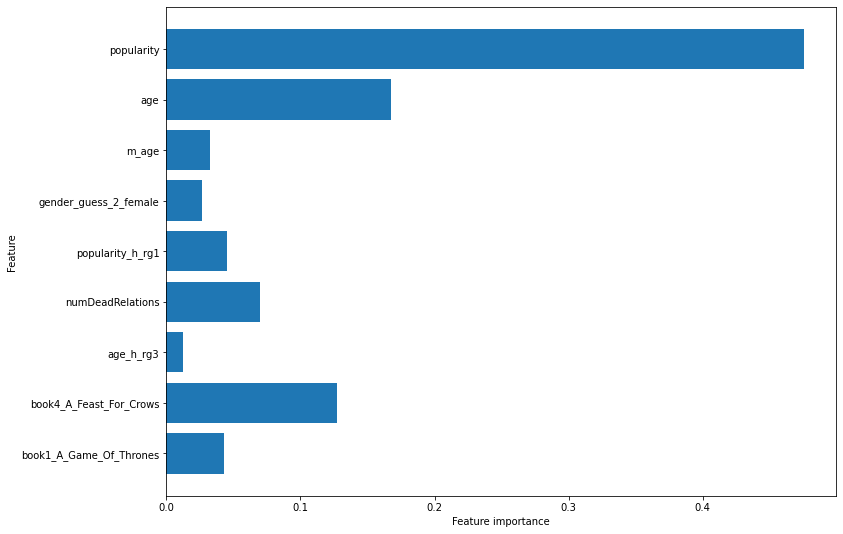

In [409]:
# plotting feature importances
plot_feature_importances(rf_default_fit, x_train)

In [410]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 27
False Positives: 23
False Negatives: 11
True Positives : 134



## h) Tuned Random Forest

In [411]:
# # FITTING the training data
# rf_default_fit = rf_default.fit(x_train, y_train)


# # PREDICTING based on the testing set
# rf_default_fit_pred = rf_default_fit.predict(x_test)


# # declaring a hyperparameter space
# estimator_range  = np.arange(100, 1100, 250)
# leaf_range       = np.arange(1, 31, 10)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_range,
#               'min_samples_leaf' : leaf_range,
#               'criterion'        : criterion_range,
#               'bootstrap'        : bootstrap_range,
#               'warm_start'       : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)


# # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                                param_distributions = param_grid,
#                                cv         = 3,
#                                n_iter     = 1000,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [412]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(random_state=219, warm_start=True)

In [413]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion='gini', min_samples_leaf=1,
                       n_estimators=100, random_state=219, warm_start=True, bootstrap = True,
                                      class_weight =  'balanced')


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)



# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


Forest Tuned Training ACCURACY: 0.8504
Forest Tuned Testing  ACCURACY: 0.8872
Forest Tuned AUC Score        : 0.9045


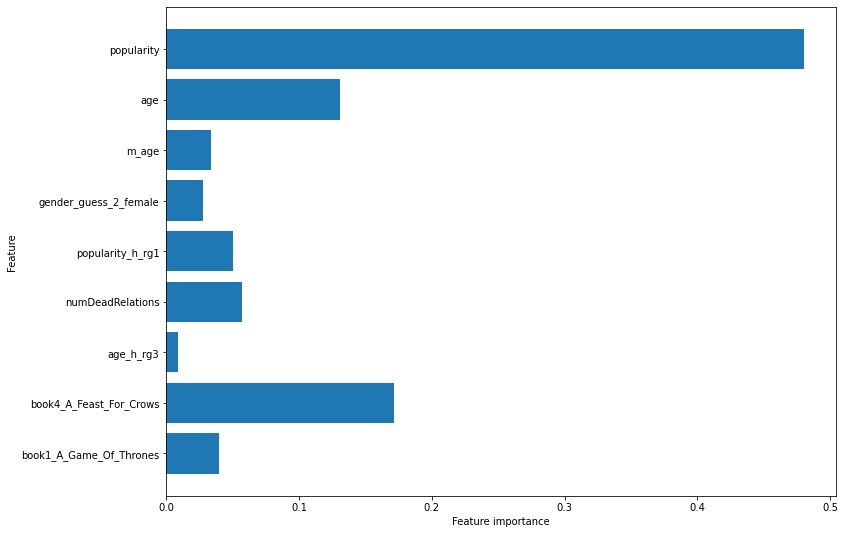

In [414]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [415]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 47
False Positives: 3
False Negatives: 19
True Positives : 126



## i) GBM Model

In [416]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 4,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

full_gbm_train_score = full_gbm_default_fit.score(x_train, y_train).round(4)
full_gbm_test_score = full_gbm_default_fit.score(x_test, y_test).round(4)
full_gbm_auc_score = roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4)

Training ACCURACY: 0.8435
Testing ACCURACY : 0.8513
AUC Score        : 0.7428


In [417]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 5
True Positives : 140



## j) Tuned GBM Model

In [418]:
# # declaring a hyperparameter space
# learn_range        = np.arange(0.1, 2.2, 0.5)
# estimator_range    = np.arange(100, 501, 25)
# depth_range        = np.arange(1, 8, 1)
# warm_start_range   = [True, False]

# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# tune_gbm_grid = GradientBoostingClassifier(random_state = 219)


# # GridSearchCV object
# tune_gbm_cv = RandomizedSearchCV(estimator     = tune_gbm_grid,
#                            param_distributions = param_grid,
#                            cv                  = 3,
#                            n_iter              = 500,
#                            random_state        = 219,
#                            scoring             = make_scorer(roc_auc_score,
#                                                  needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# tune_gbm_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tune_gbm_cv.best_params_)
# print("Tuned Training AUC:", tune_gbm_cv.best_score_.round(4))

In [429]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 1.1,
                                       max_depth     = 8,
                                       n_estimators  = 500,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))
gbm_tuned_train = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_tuned_test = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_tuned_auc = roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4)

Training ACCURACY: 0.8864
Testing  ACCURACY: 0.9333
AUC Score        : 0.8897


In [420]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 41
False Positives: 9
False Negatives: 4
True Positives : 141



## k) KNN Neighbors Model

In [421]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors =30)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   =  roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7875
Testing  ACCURACY: 0.8256
AUC Score        : 0.7124


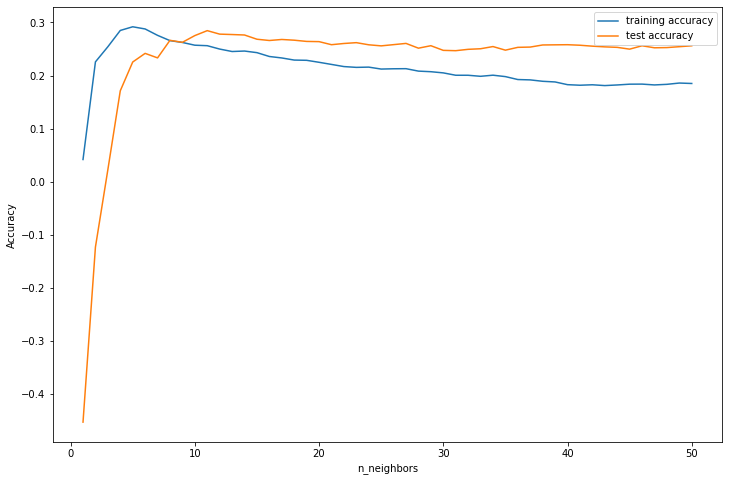

In [422]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [423]:
# unpacking the confusion matrix
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tn}
False Positives: {knn_fp}
False Negatives: {knn_fn}
True Positives : {knn_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 8
True Positives : 137



# 7) Comparing the score of different regression models 

### After analysing the final result of the different models, I chose the tuned random forest tree regression model because it has the better AUC and the GAP between the Train and Test Score is less than 4%. 

In [430]:
print(f"""
Model                             Train Score      Test Score      AUC Score       Confussion Matrix (TN, FP, FN, TP)
-----                             -----------      ---------       ---------       -----------------
Log Regression                    {round(logreg_train_score,3)}            {round(logreg_test_score,3)}           {round(logreg_auc_score,3)}             {logreg_tn}, {logreg_fp}, {logreg_fn}, {logreg_tp} 
Tuned Log Regression              {round(lr_tuned_train_score,3)}            {round(lr_tuned_test_score,3)}           {round(lr_tuned_auc,3)}             {tuned_logreg_tn}, {tuned_logreg_fp}, {tuned_logreg_fn}, {tuned_logreg_tp}
Full Tree Regression              {round(full_tree_train_score,3)}            {round(full_tree_test_score,3)}            {round(full_tree_auc_score,3)}             {full_tree_tn}, {full_tree_fp}, {full_tree_fn}, {full_tree_tp}
Pruned Tree Regression            {round(pruned_tree_train_score,3)}            {round(pruned_tree_test_score,3)}           {round(pruned_tree_auc_score,3)}             {pruned_tree_tn}, {pruned_tree_fp}, {pruned_tree_fn}, {pruned_tree_tp}
Tuned Tree Regression             {round(tuned_tree_train_score,3)}            {round(tuned_tree_test_score,3)}            {round(tuned_tree_auc_score,3)}              {tuned_tree_tn}, {tuned_tree_fp}, {tuned_tree_fn}, {tuned_tree_tp}
Random Forest                     {round(random_forest_train,3)}            {round(random_forest_test,3)}           {round(random_forest_auc_score,3)}             {rf_tn}, {rf_fp}, {rf_fn}, {rf_tp}
{'*' * 100}
Random Forest Tuned (Final Model) {round(forest_tuned_train_score,3)}             {round(forest_tuned_test_score,3)}           {round(forest_tuned_auc,3)}             {tuned_rf_tn}, {tuned_rf_fp}, {tuned_rf_fn}, {tuned_rf_tp}
{'*' * 100}
GBM Regression                    {round(full_gbm_train_score,3)}            {round(full_gbm_test_score,3)}           {round(full_gbm_auc_score,3)}             {gbm_default_tn}, {gbm_default_fp}, {gbm_default_fn}, {gbm_default_tp}
GBM Regression Tuned              {round(gbm_tuned_train,3)}            {round(gbm_tuned_test,3)}           {round(gbm_tuned_auc,3)}             {gbm_tuned_tn}, {gbm_tuned_fp}, {gbm_tuned_fn}, {gbm_tuned_tp}
KNN Regression                    {round(knn_train_score,3)}            {round(knn_test_score,3)}           {round(knn_auc_score,3)}             {knn_tn}, {knn_fp}, {knn_fn}, {knn_tp}  
""")


Model                             Train Score      Test Score      AUC Score       Confussion Matrix (TN, FP, FN, TP)
-----                             -----------      ---------       ---------       -----------------
Log Regression                    0.781            0.851           0.776             31, 19, 10, 135 
Tuned Log Regression              0.759            0.836           0.824             40, 10, 22, 123
Full Tree Regression              0.888            0.81            0.735             29, 21, 16, 129
Pruned Tree Regression            0.792            0.862           0.737             24, 26, 1, 144
Tuned Tree Regression             0.741            0.81            0.82              42, 8, 29, 116
Random Forest                     0.888            0.826           0.732             27, 23, 11, 134
****************************************************************************************************
Random Forest Tuned (Final Model) 0.85             0.887           0.904  